<a href="https://colab.research.google.com/github/Zaxzz/kecerdasan_buatan/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Baca file data_customer.csv menggunakan pandas.

In [36]:
import pandas as pd
df = pd.read_csv('data_customer.csv')
df

,CustomerID,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
5,6,22,17,76
6,7,35,18,6
7,8,23,18,94
8,9,64,19,3
9,10,30,19,72


## Tampilkan 5 data pertama.

In [13]:
print("Lima data pertama:")
df.head()

Lima data pertama:


,CustomerID,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


## Tampilkan informasi awal dataset: jumlah data, nama kolom, dan tipe data

In [16]:
print("\nJumlah data (baris, kolom):", df.shape)
print("\nNama kolom:")
print(df.columns.tolist())

print("\nTipe data tiap kolom:")
print(df.dtypes)


Jumlah data (baris, kolom): (20, 4)

Nama kolom:
['CustomerID', 'Age', 'AnnualIncome', 'SpendingScore']

Tipe data tiap kolom:
CustomerID       int64
Age              int64
AnnualIncome     int64
SpendingScore    int64
dtype: object


## Cek missing value

In [18]:
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

Jumlah missing value per kolom:
CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


## Normalisasi fitur numerik

In [25]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

numerik_cols = ['Age', 'AnnualIncome', 'SpendingScore']

df_asli = df[numerik_cols].copy()

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerik_cols]), columns=numerik_cols)
print(df_scaled.head())


        Age  AnnualIncome  SpendingScore
0  0.020408      0.000000       0.375000
1  0.061224      0.000000       0.812500
2  0.040816      0.111111       0.031250
3  0.102041      0.111111       0.770833
4  0.265306      0.222222       0.385417


## Scatter Plot Sebelum dan Sesudah Normalisasi

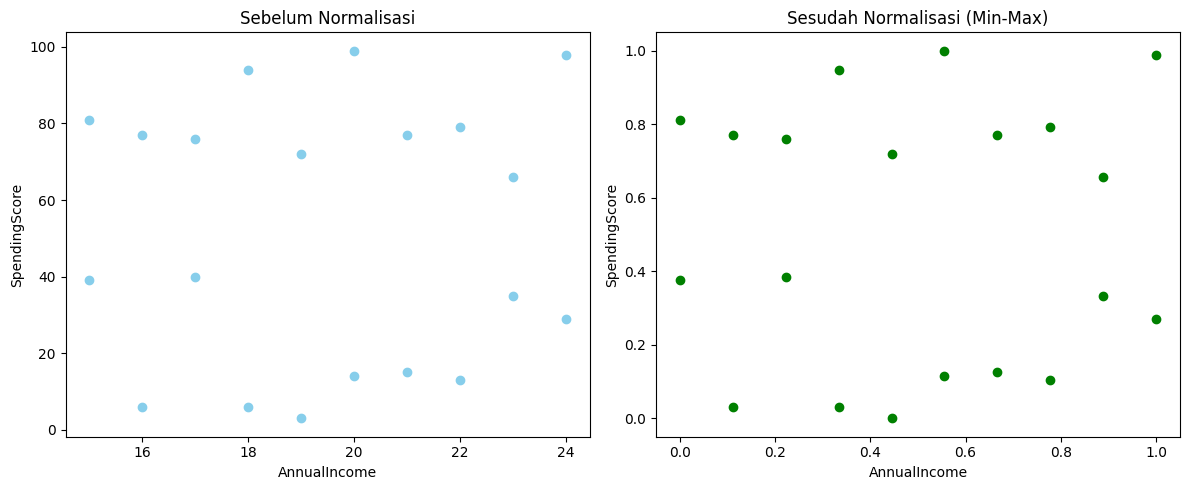

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_asli['AnnualIncome'], df_asli['SpendingScore'], color='skyblue')
plt.title('Sebelum Normalisasi')
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')

plt.subplot(1, 2, 2)
plt.scatter(df_scaled['AnnualIncome'], df_scaled['SpendingScore'], color='green')
plt.title('Sesudah Normalisasi (Min-Max)')
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')

plt.tight_layout()
plt.show()


## Tentukan jumlah klaster optimal (Metode Elbow)



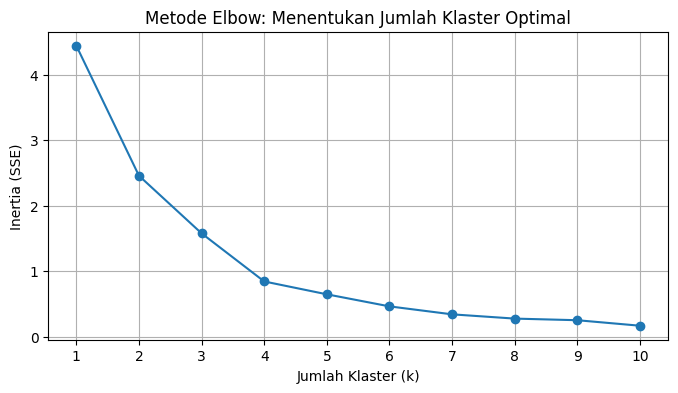

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df_scaled[['AnnualIncome', 'SpendingScore']]

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.title('Metode Elbow: Menentukan Jumlah Klaster Optimal')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia (SSE)')
plt.xticks(K)
plt.grid(True)
plt.show()


## Terapkan K-Means Clustering

In [45]:
kmeans = KMeans(n_clusters=5, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(X)

df['Cluster'] = df_scaled['Cluster']
print(df[['AnnualIncome', 'SpendingScore', 'Cluster']].head())


   AnnualIncome  SpendingScore  Cluster
0            15             39        4
1            15             81        0
2            16              6        2
3            16             77        0
4            17             40        4


## Tampilkan plot 2D hasil klastering scatter plot

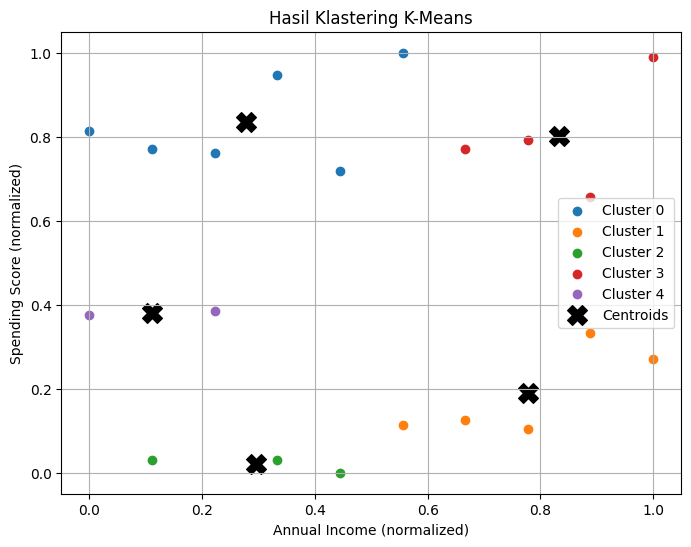

In [28]:
plt.figure(figsize=(8, 6))

for cluster in sorted(df_scaled['Cluster'].unique()):
    subset = df_scaled[df_scaled['Cluster'] == cluster]
    plt.scatter(subset['AnnualIncome'], subset['SpendingScore'], label=f'Cluster {cluster}')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

plt.title('Hasil Klastering K-Means')
plt.xlabel('Annual Income (normalized)')
plt.ylabel('Spending Score (normalized)')
plt.legend()
plt.grid(True)
plt.show()
